In [33]:
import pandas as pd 



data = pd.read_csv("custom_sample_mass_radius_y_ext_15.csv", 
                   header=None, 
                   names=["Mass", "Radius","yR_value", "Type"], 
                   low_memory=False)

m_r_p = data.iloc[1:, :-1]
star_type = data.iloc[1:, -1]




In [34]:
m_r_p

,Mass,Radius,yR_value
1,0.0239549305720704,2.98999999999998,-1.015751400051896
2,0.1651435185533361,5.649999999999924,-0.9998872911101022
3,0.3093906578999103,6.929999999999897,-0.993080419607925
4,0.450307830118857,7.799999999999878,-0.9674775851416816
5,0.5819158864533561,8.449999999999864,-0.9512017823190964
...,...,...,...
64014,0.3281513692602911,9.704637268990968,1.684180273941923
64015,0.3454735671110727,9.389547248496797,1.662188026427686
64016,0.3605967455937601,9.119104976695176,1.6454496132519127
64017,0.3753546562432278,8.579051299704627,1.6470826056416743


In [35]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)





In [36]:
classifier = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=12, max_features="log2",  random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



accuracy score:99.99%


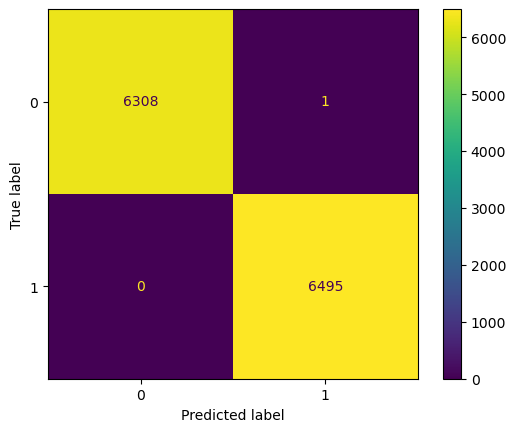

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot() 


print(f"accuracy score:{accuracy_score(y_test, y_pred) * 100:.2f}%")


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6309
           1       1.00      1.00      1.00      6495

    accuracy                           1.00     12804
   macro avg       1.00      1.00      1.00     12804
weighted avg       1.00      1.00      1.00     12804



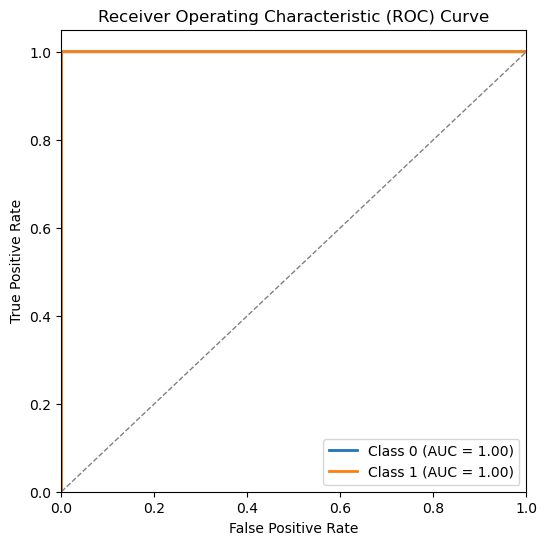

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()